In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
assi_df=pd.read_excel('assigned_tech.xlsx')

In [3]:
assi_df.head()

,Unnamed: 0,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc,Zip_income
0,0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000,23933.540000
1,1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000,68711.216667
2,2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667,110329.465000
3,3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000,32925.410000
4,4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000,83225.340000


In [4]:
assi_df=assi_df.drop(['Unnamed: 0'],axis=1)

In [5]:
assi_df.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc', 'Zip_income'],
      dtype='object')

In [6]:
assi_df=assi_df[['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc']]

In [7]:
assi_df.head()

,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc
0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000
1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000
2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667
3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000
4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000


<AxesSubplot:>

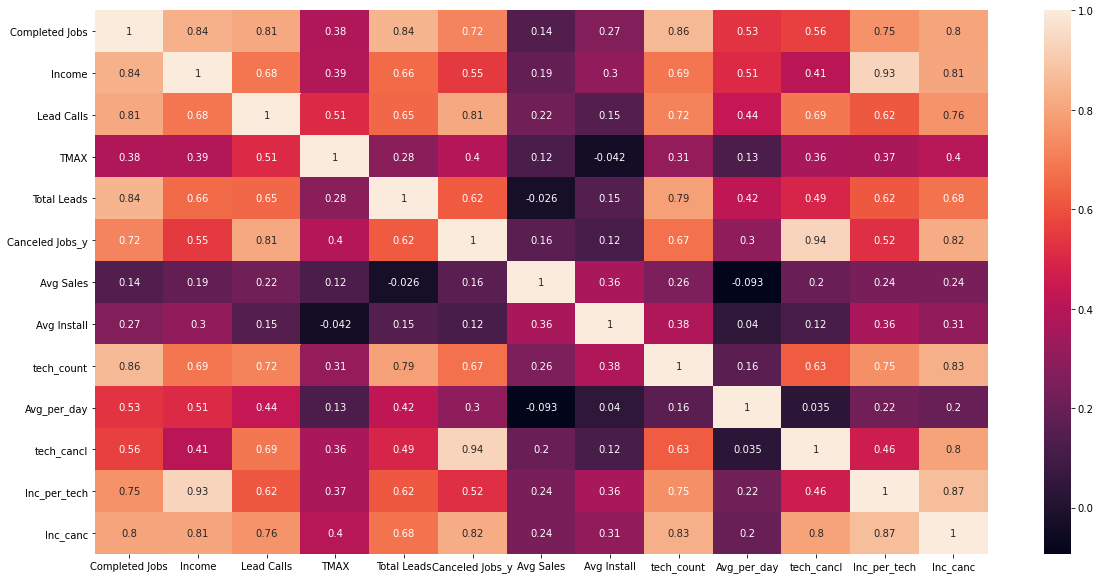

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(assi_df.corr(method='spearman'),annot=True)

In [9]:
assi_df.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc'],
      dtype='object')

In [10]:
assi_df.shape

(359, 13)

In [11]:
train=assi_df[0:300]
test=assi_df[300:]

In [12]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# creating linear regression model

reg_model=LinearRegression(normalize=True)

In [16]:
# fit independent varaibles to the dependent variables
reg_model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [17]:
reg_model.score(X_train,y_train)

0.9580769143049872

In [18]:
reg_model.score(X_test,y_test)

0.966428377420319

In [19]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [21]:
reg_model.score(X_,y_)

0.9124777431189195

In [22]:
assi_df.tail()

,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc
354,46,53637.35,60,56,6,4,926.877083,4765.916667,23,2,2,26818.675000,53637.350000
355,108,28791.98,83,69,41,11,672.179767,2024.658710,64,2,6,14395.990000,86375.940000
356,128,56282.45,77,69,40,5,693.284466,1693.243421,55,3,2,18760.816667,37521.633333
357,124,72449.57,64,66,49,3,1225.526609,3212.224545,54,3,1,24149.856667,24149.856667
358,128,125057.66,73,68,48,10,703.228925,1636.235294,54,3,4,41685.886667,166743.546667


In [23]:
y_pred=reg_model.predict(X_)

In [24]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

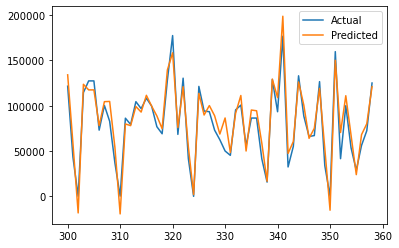

In [25]:
comp.plot()

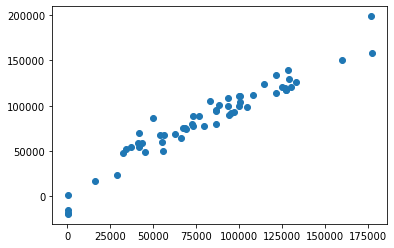

In [26]:
plt.scatter(y_,y_pred)

In [27]:
from sklearn import metrics

In [28]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))

RMSE: 12346.455927901925
MAE: 10149.831356099034


# Ridge

In [29]:
y_.median()

82920.44

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [31]:
# Intializig ridge model
reg_model_1=Ridge()

In [32]:
# lamda parameter range 

hyperparameter_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [33]:
# Searching best hyperparameter using gridsearch 

ridge_reg=GridSearchCV(reg_model_1,hyperparameter_range,scoring='neg_root_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [34]:
# Best lamda
ridge_reg.best_params_

{'alpha': 70}

In [35]:
# error value 
ridge_reg.best_score_

-15134.914159943053

In [36]:
reg_model_2=Ridge(alpha=70)

In [37]:
reg_model_2.fit(X_train,y_train)

Ridge(alpha=70)

In [38]:
reg_model_2.score(X_train,y_train)

0.9568175474174341

In [39]:
reg_model_2.score(X_test,y_test)

0.9658480210707637

In [40]:
reg_model_2.score(X_,y_)

0.9064571390837896

In [41]:
y_pre_1=reg_model_2.predict(X_)

In [42]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

RMSE: 12764.04658583688
MAE: 10591.676882740288


# Lasso

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [44]:
# Intializing the model 
reg_model_3=Lasso()

In [45]:
# hyper parameter range 
hyperparameters_range={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

In [46]:
# Searching best hyper parameter 

lasso_reg=GridSearchCV(reg_model_3,hyperparameters_range,scoring='neg_root_mean_squared_error',cv=5)

lasso_reg.fit(X,y)

C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21722056469.139, tolerance: 113086715.74968219
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20749744880.196335, tolerance: 105775080.25549069
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19246635205.692417, tolerance: 101252156.32803895
  positive)
C:\Users\vksva\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100]},
             scoring='neg_root_mean_squared_error')

In [47]:
#best parameters
lasso_reg.best_params_

{'alpha': 100}

In [48]:
#best score
lasso_reg.best_score_

-15680.405176451157

In [49]:
lasso_pre=Lasso(alpha=100)

In [50]:
lasso_pre.fit(X_train,y_train)

Lasso(alpha=100)

In [51]:
lasso_pre.score(X_train,y_train)

0.9580672807134897

In [52]:
lasso_pre.score(X_test,y_test)

0.9664064527613877

In [53]:
lasso_pre.score(X_,y_)

0.9120586186821555

In [54]:
y_pre_2=lasso_pre.predict(X_)

In [55]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

RMSE: 12375.982823342601
MAE: 10190.46528389052


In [56]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pre_1})

In [57]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pre_2})

<AxesSubplot:title={'center':'Lasso Regression'}>

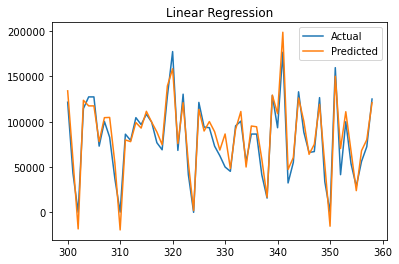

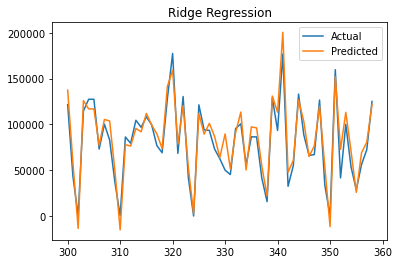

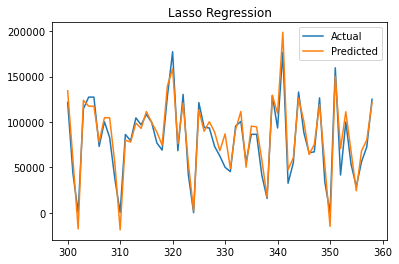

In [58]:
#comparision 
comp.plot(title='Linear Regression')
comp_1.plot(title='Ridge Regression')
comp_2.plot(title='Lasso Regression')

In [59]:
print('====Linear Regression========')
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred))


print('====Ridge Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_1))

print('====Lasso Regression========')

# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

====Linear Regression========
RMSE: 12346.455927901925
MAE: 10149.831356099034
====Ridge Regression========
RMSE: 12764.04658583688
MAE: 10591.676882740288
====Lasso Regression========
RMSE: 12375.982823342601
MAE: 10190.46528389052
